In [150]:
from sklearn.ensemble import IsolationForest 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import VarianceThreshold

from pyod.models.knn import KNN 

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

sns.set()

## Кластеризация

### K-means

Сгенерируем произвольные данные

In [151]:
data = np.array([[np.random.rand(), np.random.rand()] for _ in range(500)])

/tmp/ipykernel_339/997464193.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='f1', ylabel='f2'>

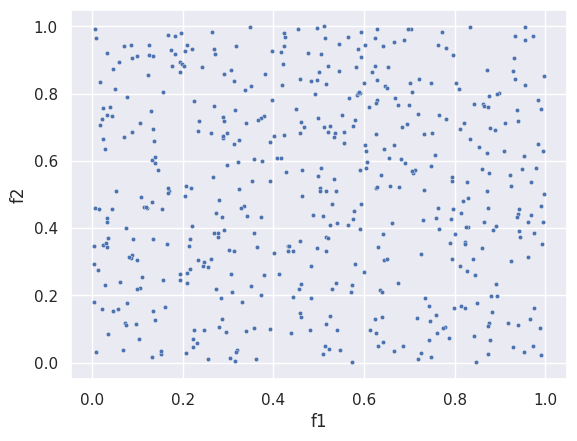

In [152]:
sns.scatterplot(
    data=pd.DataFrame(data, columns=['f1', 'f2']), 
    x='f1',
    y='f2',
    palette='deep',
    s=10
)

Обучим метод K-средних

In [153]:
# Обучение модели
model = KMeans(4, random_state=12)
model.fit(data)

print("Центроиды кластеров:")
print(model.cluster_centers_)

Центроиды кластеров:
[[0.70629733 0.74626385]
 [0.22248013 0.27137358]
 [0.75754291 0.25397139]
 [0.23975129 0.79029468]]


In [199]:
data

array([[4.97660102e-01, 5.54005821e-01],
       [6.89834349e-01, 5.94371218e-01],
       [7.65266443e-01, 3.98172815e-01],
       [7.29907548e-01, 4.25518676e-01],
       [1.93889869e-01, 2.44565360e-01],
       [5.00893965e-01, 8.63594612e-01],
       [8.93096585e-01, 1.97184209e-01],
       [5.23741299e-01, 7.02052019e-01],
       [5.15434303e-01, 5.10637686e-01],
       [5.16097018e-01, 3.74707094e-01],
       [1.82621080e-01, 9.71618622e-01],
       [8.50648296e-02, 9.45690549e-01],
       [5.04625560e-01, 9.16539412e-01],
       [8.79320598e-01, 1.99604074e-01],
       [5.72525712e-01, 6.99998523e-04],
       [9.82862957e-01, 6.51209251e-01],
       [4.50001607e-01, 7.53899130e-01],
       [9.39843043e-01, 7.17618790e-01],
       [5.50743718e-01, 7.37433183e-01],
       [2.08338229e-01, 9.44837058e-01],
       [2.21929869e-01, 4.62509451e-02],
       [6.97663696e-02, 9.40533257e-01],
       [5.02087801e-01, 5.20093374e-01],
       [9.17584678e-01, 1.17037700e-01],
       [8.855209

<Axes: xlabel='f1', ylabel='f2'>

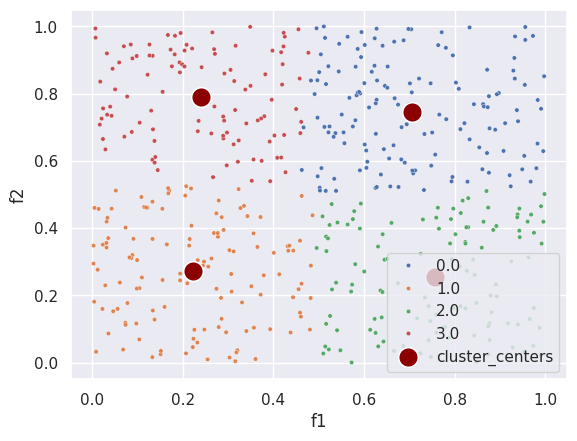

In [154]:
# разметка моделью
sns.scatterplot(
    data=pd.DataFrame(np.hstack([data, np.array([model.labels_]).T]), columns=['f1', 'f2', 'label']), 
    x='f1',
    y='f2',
    hue='label', 
    palette='deep',
    s=10
)

sns.scatterplot(
    pd.DataFrame(model.cluster_centers_, columns=['f1', 'f2']), 
    color='darkred', 
    x='f1',
    y='f2',
    s=200,
    label='cluster_centers'
)


In [155]:
# оценка качества модели
print("Целевая функция:")
print(model.inertia_)

Целевая функция:
21.240908140891595


In [156]:
# попробуем иначе разместить центры кластеров
model = KMeans(n_clusters=3, random_state=0, init=[[0.5, 0], [1, 1], [0, 1]])
model.fit(data)

print("Целевая функция модели с начальными центроидами:")
print(model.inertia_)

Целевая функция модели с начальными центроидами:
34.161268178003716


<Axes: xlabel='f1', ylabel='f2'>

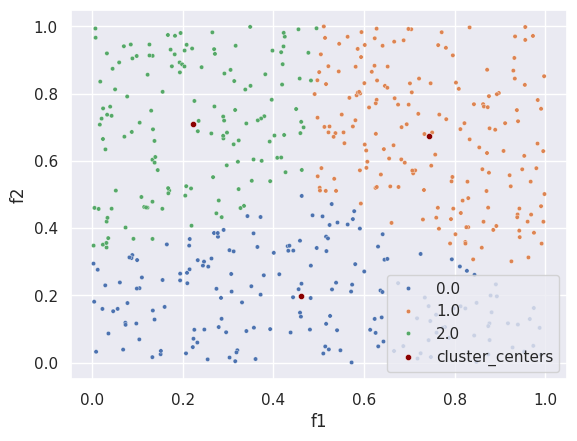

In [157]:
# разметка моделью
sns.scatterplot(
    data=pd.DataFrame(np.hstack([data, np.array([model.labels_]).T]), columns=['f1', 'f2', 'label']), 
    x='f1',
    y='f2',
    hue='label', 
    palette='deep',
    s=10
)
sns.scatterplot(
    pd.DataFrame(model.cluster_centers_, columns=['f1', 'f2']), 
    color='darkred', 
    x='f1',
    y='f2',
    s=20,
    label='cluster_centers'
)

### Визуализация

Сгенерируем произвольные данные бОльшей размерности.

In [158]:
varied = datasets.make_blobs(
    n_samples=500, cluster_std=[1.0, 2.5, 0.5], random_state=123, n_features=3
)
data_2 = pd.DataFrame(varied[0], columns=['f1', 'f2', 'f3'])
data_2.head()

,f1,f2,f3
0,9.090242,3.468917,0.741360
1,-1.306870,5.814657,-0.546549
2,3.840042,-3.223516,-6.204020
3,3.061613,0.678294,-3.473177
4,2.081576,6.415268,-1.593688


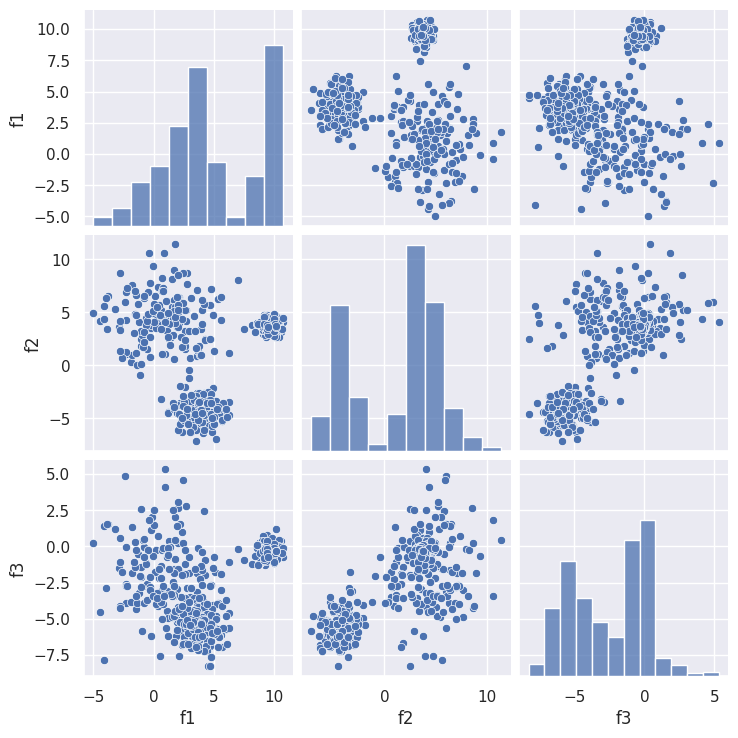

In [159]:
sns.pairplot(data_2, diag_kind='hist'); 

In [160]:
# построим кластеризацию
model = KMeans(n_clusters=3, random_state=45)
model.fit(data_2)

KMeans(n_clusters=3, random_state=45)

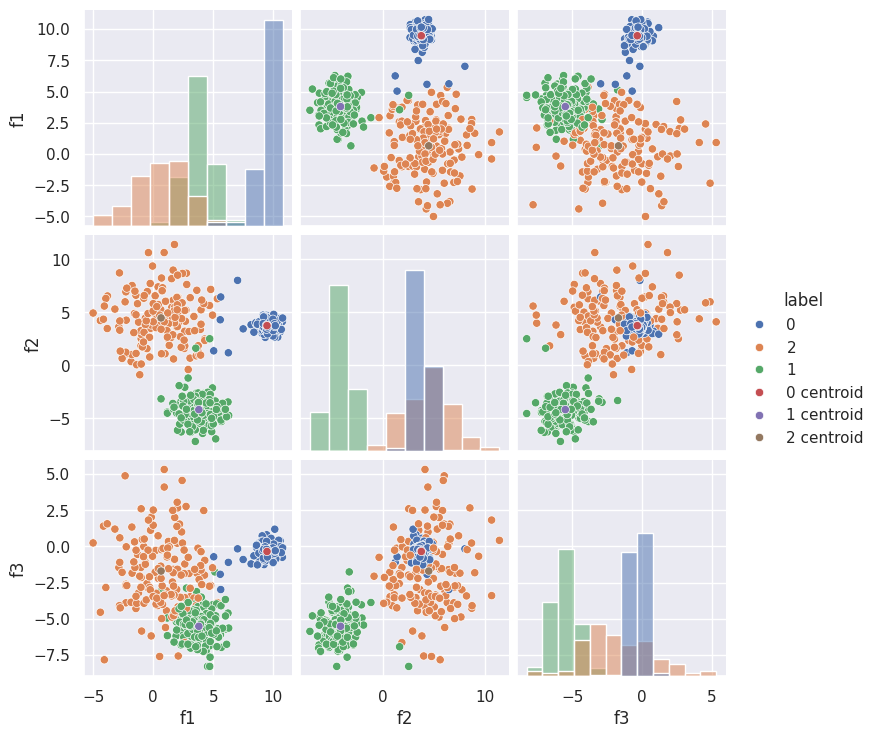

In [161]:
# визуализируем результаты
centroids = pd.DataFrame(model.cluster_centers_, columns=['f1', 'f2', 'f3'])
# Добавление столбца с номером кластера
data_2_w_label = data_2.copy()
data_2_w_label['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']

data_all = pd.concat([data_2_w_label, centroids], ignore_index=True)

# Построение графика
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist') 


In [162]:
model.cluster_centers_

array([[ 9.46898088,  3.74390465, -0.3463602 ],
       [ 3.79605292, -4.17444685, -5.51171565],
       [ 0.65224069,  4.47386611, -1.69781161]])

### Метод локтя

In [163]:
distortion = []
K = range(1, 10)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=4)
    model.fit(data_2)
    distortion.append(model.inertia_) 

100%|██████████| 9/9 [00:00<00:00, 119.48it/s]


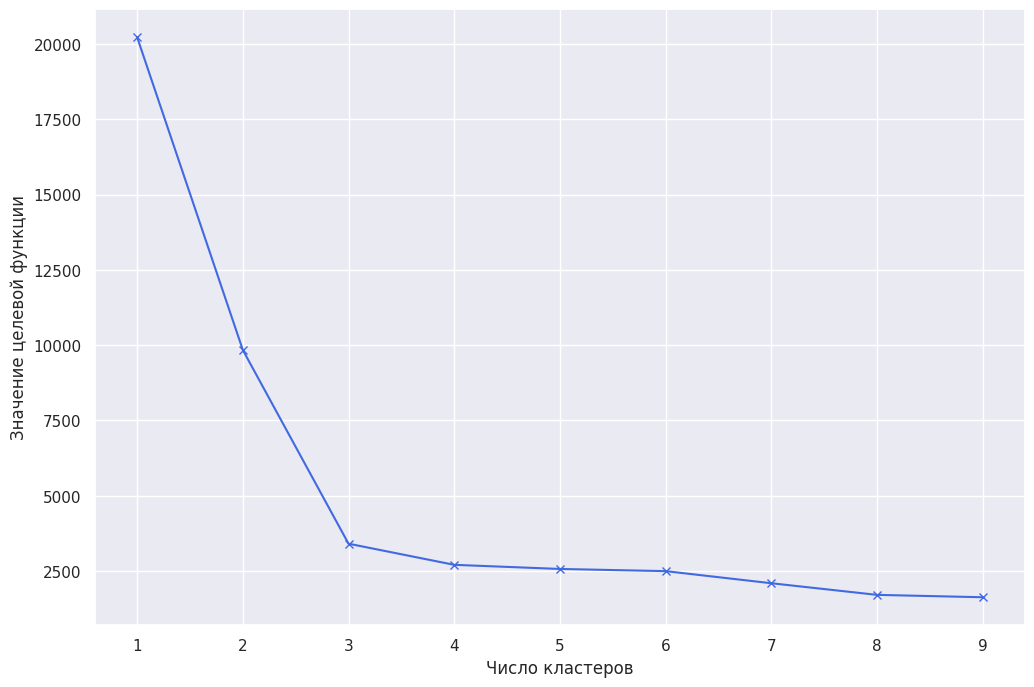

In [164]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, c='royalblue', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

## Поиск аномалий

### Диаграмма размаха

In [165]:
data_titanic = pd.read_csv('titanic.csv')
data_titanic.head(4)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


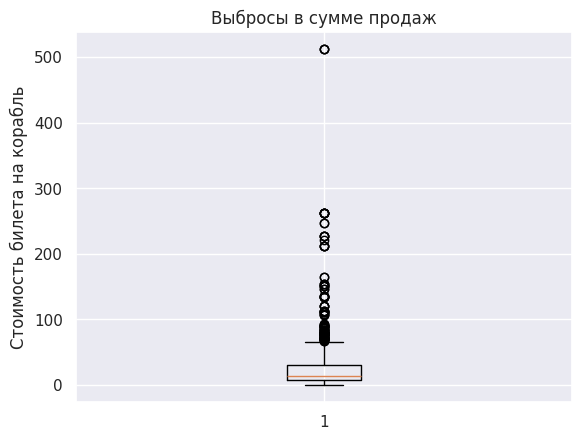

In [166]:
plt.boxplot(data_titanic['Fare'].values)
plt.ylabel('Стоимость билета на корабль')
plt.title("Выбросы в сумме продаж")
plt.show() 

Диаграмма даёт информацию обо всех выбросах. Она хранится в записи "fliers"внутри объекта boxplot. Вызовом функции get_data() из объектов получим числа. Нужные значения отделены индексами.

Выбросов в стоимостях билетов:  116


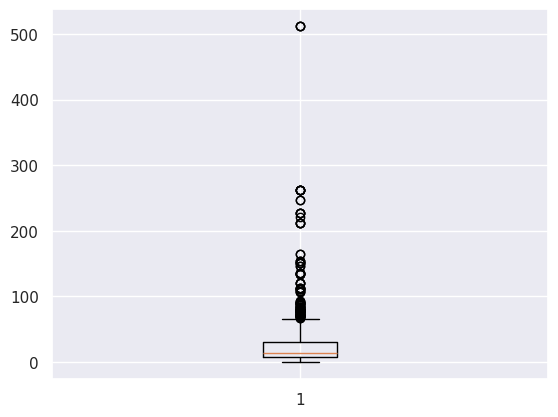

In [167]:
boxplot = plt.boxplot(data_titanic['Fare'].values)
outliers_bp = list(boxplot["fliers"][0].get_data()[1])
print("Выбросов в стоимостях билетов: ", len(outliers_bp)) 

Рассчитаем выбросы самостоятельно

In [168]:
l = np.quantile(data_titanic['Fare'], 0.25)
r = np.quantile(data_titanic['Fare'], 0.75)
iqr = r - l

print(data_titanic['Fare'].shape[0] - (data_titanic['Fare'].apply(lambda f: l - 1.5 * iqr < f < r + 1.5 * iqr)).sum())

116


In [169]:
print('Верхняя граница усов:', r + 1.5 * iqr)
print(116/data_titanic.shape[0])

Верхняя граница усов: 65.95625
0.13077790304396844


### Изоляционный лес

Пропишем количество деревьев в параметре n_estimators. Чем их больше, тем точнее результаты:

In [170]:
isolation_forest = IsolationForest(n_estimators=50, random_state=14, contamination=0.05) 

Выбор аномалий по одному признаку не даст представления обо всём датасете. Изоляционный лес найдёт выбросы по нескольким признакам. 
Например, объединим данные о стоимости билета и возрасте пассажира. 

In [171]:
data_for_iso = data_titanic[['Fare', 'Age']] 

Функцией fit_predict() можно сразу обучить модель и получить классификацию.

In [172]:
isolation_forest_predictions = (isolation_forest.fit_predict(data_for_iso) == -1)

In [173]:
outliers_iso_tree = data_for_iso[isolation_forest_predictions]

print("Количество аномалий: ", len(outliers_iso_tree))

Количество аномалий:  45


### KNN

Функция predict обученной модели KNN вернёт список, где «1» означает аномалию, а «0» — её отсутствие.

In [174]:
data_for_iso_scaled = StandardScaler().fit_transform(data_for_iso)

In [175]:
knn_model = KNN(contamination=0.05)

knn_model.fit(data_for_iso_scaled)
knn_prediction = knn_model.predict(data_for_iso_scaled) == 1
outliers_knn = data_for_iso[knn_prediction]
print("Количество аномалий (KNN): ", len(outliers_knn))

Количество аномалий (KNN):  36


Сравним результаты

In [176]:
map_color = {0: 'lightblue', 1: 'darkgreen'}

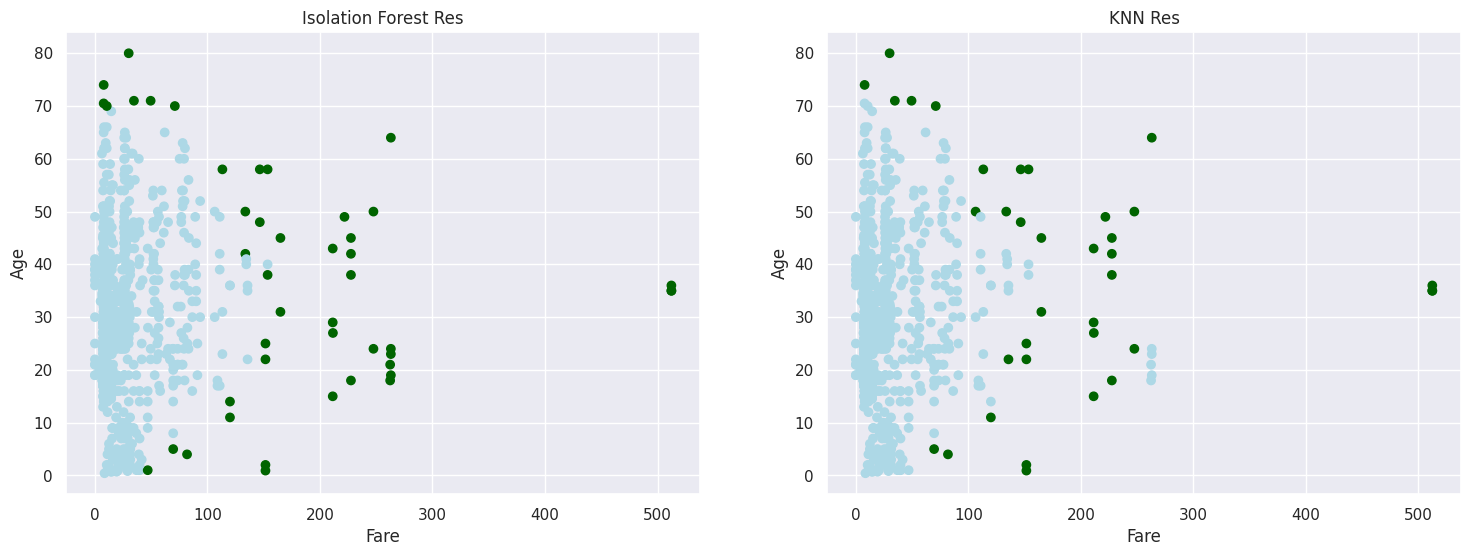

In [177]:
fig, ax = plt.subplots(1, 2, figsize=[18, 6])

for i, res in enumerate(
    [(isolation_forest_predictions, 'Isolation Forest'), 
     (knn_prediction, 'KNN')
    ]
):
    ax[i].scatter(data_for_iso['Fare'], data_for_iso['Age'], color=(pd.Series(res[0]) * 1).map(map_color))
    ax[i].set_title(f'{res[1]} Res')
    ax[i].set_xlabel('Fare')
    ax[i].set_ylabel('Age')

fig.show()

## Уменьшение размерности

### Отбор признаков

Попрактикуемся в отборе признаков на синтетических данных

In [178]:
x_data_generated, y_data_generated = datasets.make_classification(n_samples=100, n_features=20, scale=1, random_state=98765)

In [179]:
model = LogisticRegressionCV(random_state=12)
model.fit(x_data_generated, y_data_generated)

LogisticRegressionCV(random_state=12)

In [180]:
model.scores_[1].mean()

0.8340000000000001

Выберем признаки на основе матрицы корреляций

In [181]:
X = np.column_stack((x_data_generated, y_data_generated))

<Axes: >

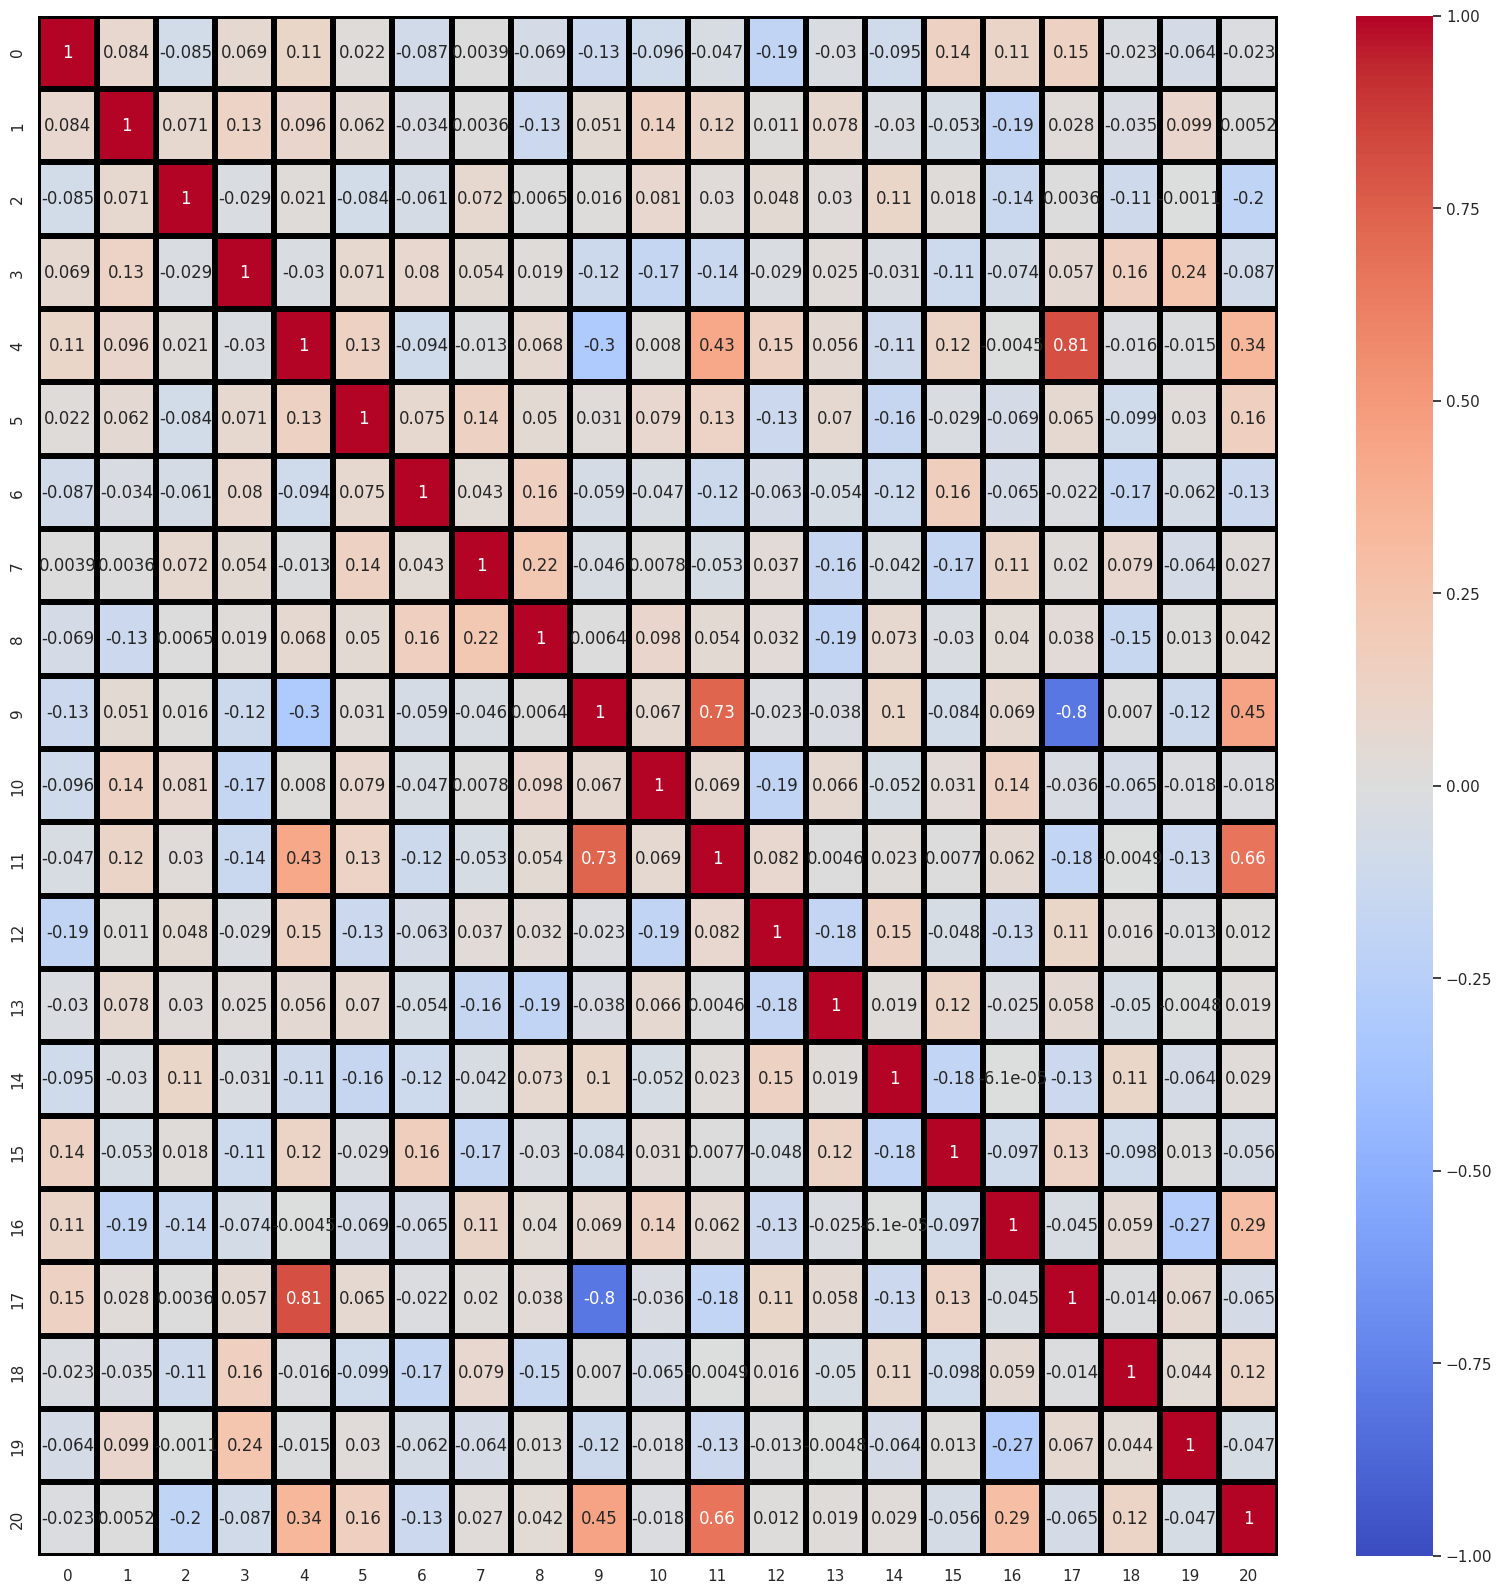

In [182]:
corr_matrix = pd.DataFrame(X).corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(
    corr_matrix, 
    annot = True, 
    vmin=-1, 
    vmax=1, 
    center=0, 
    cmap= 'coolwarm', 
    linewidths=3,
    linecolor='black', 
    ax=ax
)

4-17, 9-11, 9-17, 11-20

In [183]:
df = pd.DataFrame(x_data_generated)
df = df.loc[:, (df.columns != 4) & (df.columns != 9)]
df.shape

(100, 18)

Удалим низковариативные признаки

In [184]:
var = VarianceThreshold(threshold=1)
df2 = var.fit_transform(df)
df2.shape

(100, 9)

In [185]:
model = LogisticRegressionCV(random_state=12)
model.fit(df2, y_data_generated)
model.scores_[1].mean()

0.85

### Метод главных компонент

Загрузим игрушечный датасет из sklearn про ирисы

In [186]:
iris = datasets.load_iris(as_frame=True)
features = iris['data']
target = iris['target']
display(features.head())
features.shape

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(150, 4)

Изучим распределение ирисов разного типа по признакам, а также связи между этими признаками

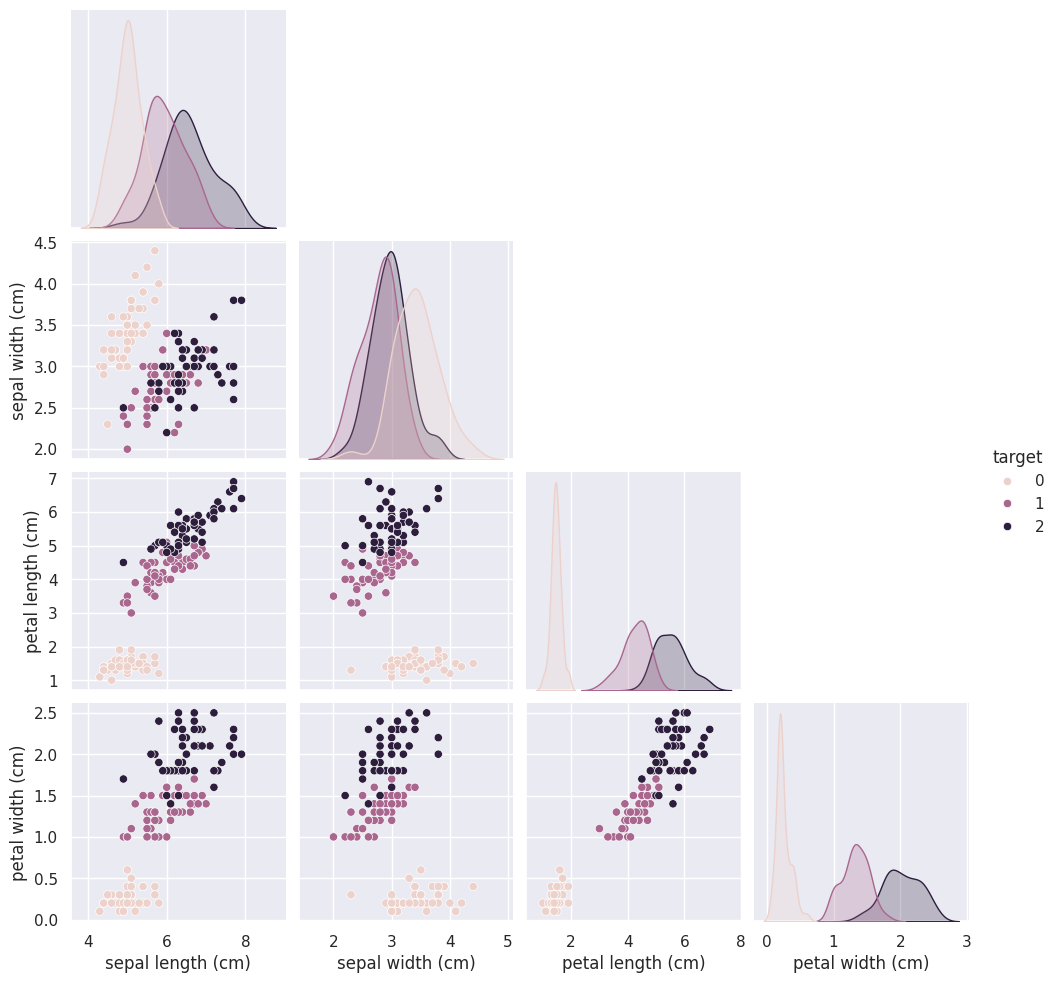

In [187]:
sns.pairplot(iris['frame'], hue='target', corner=True)

Для начала отмасштабируем выборку.

In [188]:
features_norm = StandardScaler().fit_transform(features.values)

In [189]:
sum([features_norm[:, i].var() for i in range(4)])

4.0

Подберем оптимальное количество компонент, объясняющих достаточно дисперсии в исходных данных

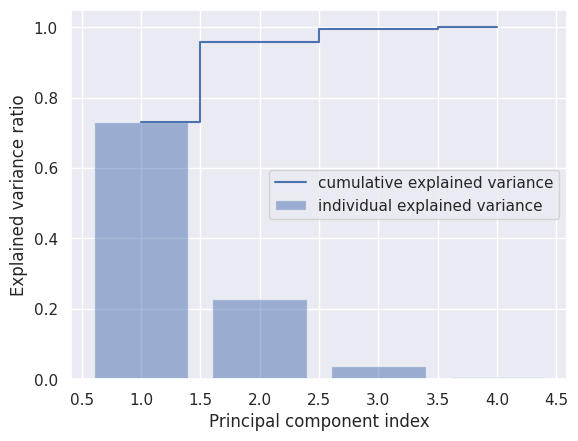

In [190]:
pca = PCA(n_components = 4)
pca.fit(features_norm)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 5), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Уменьшим количество признаков до двух

In [191]:
pca = PCA(n_components = 2)
features_reduced = pca.fit_transform(features_norm)

Изучим, как они были составлены

In [192]:
pd.DataFrame(pca.components_, columns=features.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942


In [193]:
pd.DataFrame(features_norm).corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


Убедимся, что новые векторы полностью декоррелированы

In [194]:
pd.DataFrame(features_reduced).corr()

,0,1
0,1.000000e+00,-1.018353e-16
1,-1.018353e-16,1.000000e+00


Насколько хорошо разделимы данные по новым компонентам?

In [195]:
map_color[2] = 'coral'

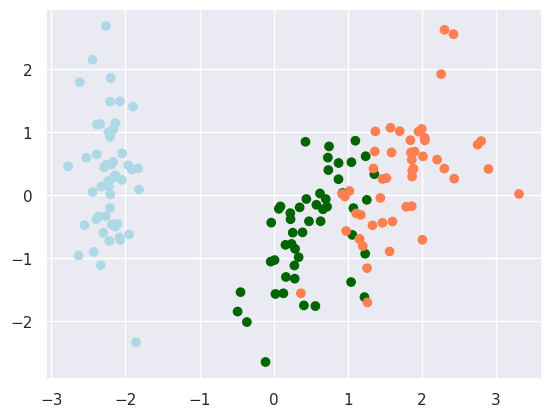

In [196]:
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], color=target.map(map_color))